# Loan Amount Prediction

---
By: B. Kathir Pandian

## -> Problem Description
   - To predict the Loan Amount for a person to avail Loan based on some characteristics.
   - This problem is a Regression problem.

## -> Dataset Description
   - There are separate datasets for training and testing.
   - The train dataset consists of 614 rows of data and 13 features.
   - The test dataset consists of 367 rows of data and 12 features.

## -> Models Tried
   - Linear Regression
   - Polynomial Regression
   - Decision Tree
   - Random Forest
   - SVR

## -> Metrics Used
   - Mean Absolute Error
   - Mean Squared Error
   - R2-score

## 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## 2. Getting the data

In [4]:
# reading the data
train_df = pd.read_csv("Dataset/train.csv")
test_df = pd.read_csv("Dataset/test.csv")

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# checking for null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
train_df.shape, test_df.shape

((614, 13), (367, 12))

In [15]:
for col in train_df.columns:
    print(col)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


## 3. Visualizing the Data

In [10]:
# comparing Loan_Status and Gender
gl = pd.crosstab(train_df["Loan_Status"], train_df["Gender"])
gl

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


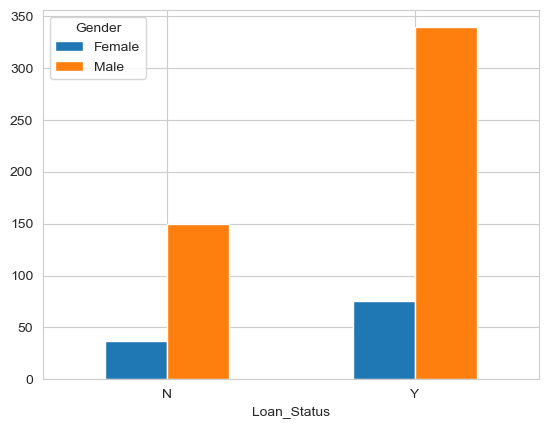

In [11]:
# plotting a bar chart
gl.plot.bar()
plt.xticks(rotation=0);

In [12]:
# comparing Loan_Status and Education
el = pd.crosstab(train_df["Loan_Status"], train_df["Education"])
el

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


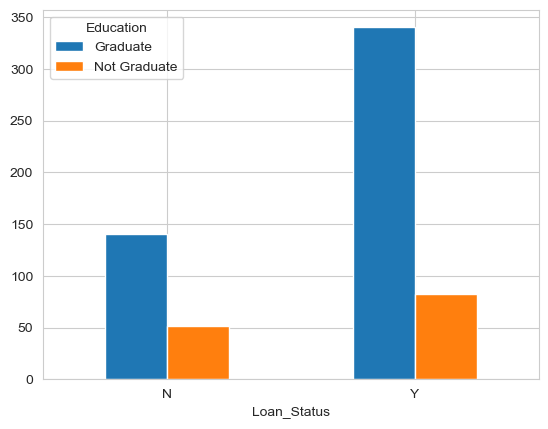

In [13]:
# plotting a bar chart
el.plot.bar()
plt.xticks(rotation=0);

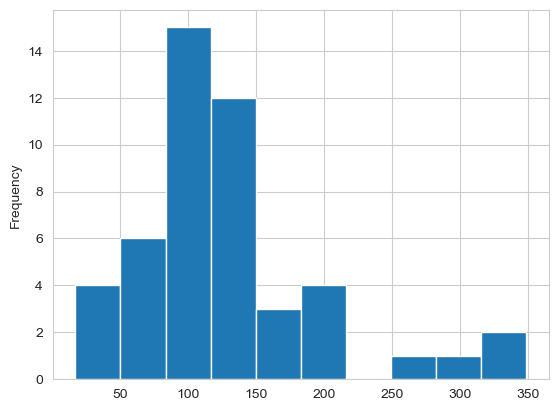

In [14]:
# plotting a histogram
train_df["LoanAmount"][:50].plot.hist();

In [15]:
train_df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

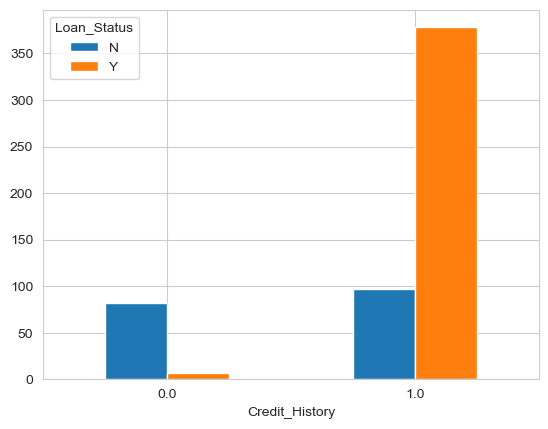

In [16]:
# plotting a bar chart
pd.crosstab(train_df["Credit_History"], train_df["Loan_Status"]).plot.bar()
plt.xticks(rotation=0);

## 4. Preprocessing the data

In [17]:
# removing rows with null value in LoanAmount column
train_df.dropna(subset=["LoanAmount"], inplace=True)
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             579 non-null    object 
 2   Married            590 non-null    object 
 3   Dependents         579 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      561 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     543 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB


In [19]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [20]:
# displaying unique values in Dependents column
pd.unique(train_df["Dependents"])

array(['1', '0', '2', '3+', nan], dtype=object)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             579 non-null    object 
 2   Married            590 non-null    object 
 3   Dependents         579 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      561 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     543 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB


In [22]:
# copying the original dataframe to another for preprocessing
train_df_enc = train_df.copy(deep=False)
test_df_enc = test_df.copy(deep=False)
train_df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [23]:
test_df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [24]:
# encoding the categorical features
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
lb_enc = LabelEncoder()
for cols in categorical_cols:
    train_df_enc[cols] = lb_enc.fit_transform(train_df[cols])
    test_df_enc[cols] = lb_enc.fit_transform(test_df[cols])
train_df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [25]:
train_df_enc.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train_df_enc["Loan_Amount_Term"].value_counts()

360.0    493
180.0     42
480.0     15
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
# filling median value for null values in the Loan_Amount_Term column
train_df_enc["Loan_Amount_Term"].fillna(train_df_enc["Loan_Amount_Term"].median(), inplace=True)

In [28]:
train_df_enc.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train_df_enc["Credit_History"].value_counts()

1.0    458
0.0     85
Name: Credit_History, dtype: int64

In [30]:
# filling 1.0 in null values in Credit_History column
train_df_enc["Credit_History"].fillna(1.0, inplace=True)

In [31]:
train_df_enc.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
# removing null rows from test data
test_df_enc.dropna(inplace=True)
test_df_enc.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [33]:
# removing loan status column
train_df_enc.drop("Loan_Status", axis=1, inplace=True)

In [34]:
test_df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [35]:
train_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             592 non-null    int32  
 2   Married            592 non-null    int32  
 3   Dependents         592 non-null    int32  
 4   Education          592 non-null    int32  
 5   Self_Employed      592 non-null    int32  
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     592 non-null    float64
 11  Property_Area      592 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 46.2+ KB


In [36]:
test_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            328 non-null    object 
 1   Gender             328 non-null    int32  
 2   Married            328 non-null    int32  
 3   Dependents         328 non-null    int32  
 4   Education          328 non-null    int32  
 5   Self_Employed      328 non-null    int32  
 6   ApplicantIncome    328 non-null    int64  
 7   CoapplicantIncome  328 non-null    int64  
 8   LoanAmount         328 non-null    float64
 9   Loan_Amount_Term   328 non-null    float64
 10  Credit_History     328 non-null    float64
 11  Property_Area      328 non-null    int32  
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 25.6+ KB


In [37]:
# Removing the Loan_ID column since it is not very valuable for prediction
train_df_enc = train_df_enc.drop("Loan_ID", axis=1)
test_df_enc = test_df_enc.drop("Loan_ID", axis=1)

In [38]:
train_df_enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [39]:
test_df_enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [40]:
train_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    int32  
 1   Married            592 non-null    int32  
 2   Dependents         592 non-null    int32  
 3   Education          592 non-null    int32  
 4   Self_Employed      592 non-null    int32  
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 41.6 KB


In [41]:
test_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             328 non-null    int32  
 1   Married            328 non-null    int32  
 2   Dependents         328 non-null    int32  
 3   Education          328 non-null    int32  
 4   Self_Employed      328 non-null    int32  
 5   ApplicantIncome    328 non-null    int64  
 6   CoapplicantIncome  328 non-null    int64  
 7   LoanAmount         328 non-null    float64
 8   Loan_Amount_Term   328 non-null    float64
 9   Credit_History     328 non-null    float64
 10  Property_Area      328 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 23.1 KB


### 4.1. Correlation Matrix

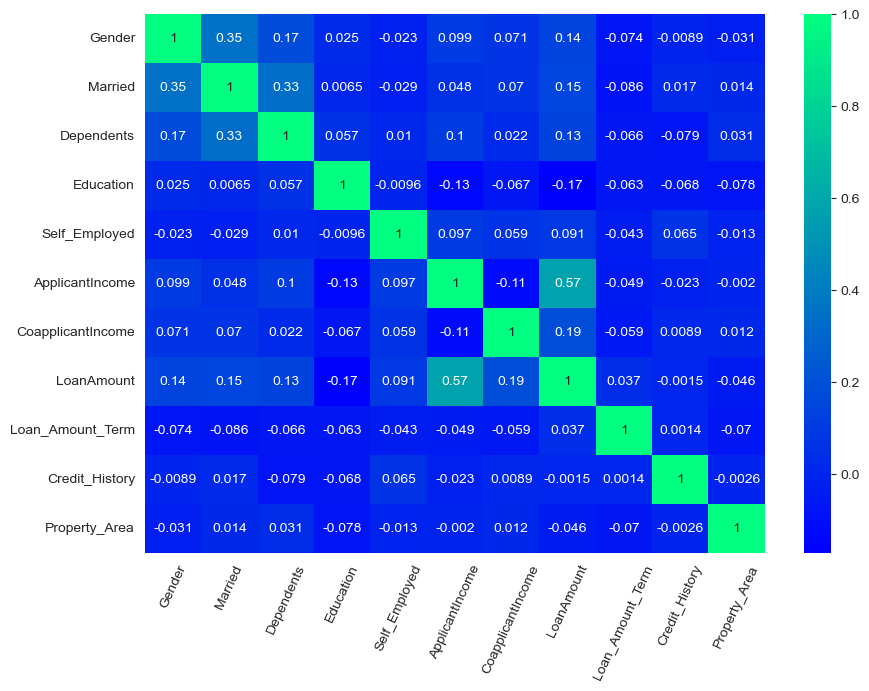

In [42]:
# displaying the correlation matrix for finding correlation among features and target
train_corr = train_df_enc.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(train_corr, annot=True, cmap="winter")
plt.xticks(rotation=65);

In [43]:
train_df_enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [44]:
# rows and columns of train dataset
train_df_enc.shape

(592, 11)

In [45]:
test_df_enc.shape

(328, 11)

In [46]:
train_df_enc.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [47]:
test_df_enc.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 4.2. Scaling the Features

In [48]:
# separating features and target
X_train = train_df_enc.drop("LoanAmount", axis=1)
y_train = train_df_enc["LoanAmount"]

X_test = test_df_enc.drop("LoanAmount", axis=1)
y_test = test_df_enc["LoanAmount"]

In [49]:
# scaling the features
mm_scl = MinMaxScaler()
train_X = mm_scl.fit_transform(X_train)
test_X = mm_scl.fit_transform(X_test)

In [50]:
X_train[:10]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,360.0,1.0,2
6,1,1,0,1,0,2333,1516.0,360.0,1.0,2
7,1,1,3,0,0,3036,2504.0,360.0,0.0,1
8,1,1,2,0,0,4006,1526.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,360.0,1.0,1
10,1,1,2,0,0,3200,700.0,360.0,1.0,2


In [51]:
X_test[:10]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,360.0,1.0,2
2,1,1,2,0,0,5000,1800,360.0,1.0,2
4,1,0,0,1,0,3276,0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,360.0,1.0,2
6,0,0,1,1,0,2226,0,360.0,1.0,1
7,1,1,2,1,0,3881,0,360.0,0.0,0
8,1,1,2,0,2,13633,0,240.0,1.0,2
9,1,0,0,1,0,2400,2400,360.0,1.0,1
10,1,0,0,1,0,3091,0,360.0,1.0,2


### 4.3. Creating a DataFrame to store the scores

In [74]:
# for storing models results
metrics_df = pd.DataFrame(columns=["LinearRegression", "PolynomialRegression", "DecisionTreeRegressor", "RandomForestRegressor", "SVR"],
                          index=["mae", "mse", "r2_score"])
metrics_df

,LinearRegression,PolynomialRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
mae,NaN,NaN,NaN,NaN,NaN
mse,NaN,NaN,NaN,NaN,NaN
r2_score,NaN,NaN,NaN,NaN,NaN


### 4.4. Creating an Evaluation Function

In [75]:
def eval_preds(y_true, y_preds):
    """
    Calculates accuracy, precision, recall, f1-score for the given y_true labels, y_preds labels
    """
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    r2score = r2_score(y_true, y_preds)
    return { # returns a dictionary of values
        "mae": mae,
        "mse": mse,
        "r2_score": r2score
    }

## 5. Creating the model

### 5.1. Linear Regression

In [76]:
np.random.seed(42)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [77]:
model_1.score(X_test, y_test)

0.22153093720116301

In [78]:
# making predictions
model_1_preds = model_1.predict(X_test)
metrics_df["LinearRegression"] = eval_preds(y_test, model_1_preds)

In [79]:
metrics_df

,LinearRegression,PolynomialRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
mae,35.056326,NaN,NaN,NaN,NaN
mse,2673.899059,NaN,NaN,NaN,NaN
r2_score,0.221531,NaN,NaN,NaN,NaN


### 5.2. Polynomial Regression

In [80]:
np.random.seed(42)
ply_fet = PolynomialFeatures()
ply_train_X = ply_fet.fit_transform(X_train)
ply_test_X = ply_fet.fit_transform(X_test)

In [81]:
model_2 = LinearRegression()
model_2.fit(ply_train_X, y_train)

LinearRegression()

In [82]:
model_2.score(ply_test_X, y_test)

-0.02885911630409077

In [83]:
# making predictions
model_2_preds = model_2.predict(ply_test_X)
metrics_df["PolynomialRegression"] = eval_preds(y_test, model_2_preds)

### 5.3. Decision Tree

In [84]:
model_3 = DecisionTreeRegressor(random_state=42)
model_3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [85]:
model_3.score(X_test, y_test)

-0.4858833102872082

In [86]:
# making predictions
model_3_preds = model_3.predict(X_test)
metrics_df["DecisionTreeRegressor"] = eval_preds(y_test, model_3_preds)

### 5.4. Random Forest

In [87]:
model_4 = RandomForestRegressor(random_state=42)
model_4.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
model_4.score(X_test, y_test)

0.2782014478815038

In [89]:
# making predictions
model_4_preds = model_4.predict(X_test)
metrics_df["RandomForestRegressor"] = eval_preds(y_test, model_4_preds)

### 5.5. SVR

In [90]:
np.random.seed(42)
model_5 = SVR()
model_5.fit(X_train, y_train)

SVR()

In [91]:
model_5.score(X_test, y_test)

0.2488384518275516

In [92]:
# making predictions
model_5_preds = model_5.predict(X_test)
metrics_df["SVR"] = eval_preds(y_test, model_5_preds)

In [93]:
metrics_df

,LinearRegression,PolynomialRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
mae,35.056326,40.783255,47.335366,33.622004,34.749702
mse,2673.899059,3533.943165,5103.737805,2479.246205,2580.102734
r2_score,0.221531,-0.028859,-0.485883,0.278201,0.248838


In [94]:
# for plotting convenience, rounding off the negative r2_scores to 0
metrics_df.loc["r2_score"]

LinearRegression         0.221531
PolynomialRegression    -0.028859
DecisionTreeRegressor   -0.485883
RandomForestRegressor    0.278201
SVR                      0.248838
Name: r2_score, dtype: float64

In [95]:
metrics_df["PolynomialRegression"]["r2_score"] = round(metrics_df["PolynomialRegression"]["r2_score"])
metrics_df["DecisionTreeRegressor"]["r2_score"] = round(metrics_df["DecisionTreeRegressor"]["r2_score"])
metrics_df

,LinearRegression,PolynomialRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
mae,35.056326,40.783255,47.335366,33.622004,34.749702
mse,2673.899059,3533.943165,5103.737805,2479.246205,2580.102734
r2_score,0.221531,0.000000,0.000000,0.278201,0.248838


- **Choosing SVR and Random Forest for Hyperparameter Tuning**

## 6. Hyperparameter Tuning
- Using GridSearchCV

### 6.1. Random Forest

In [96]:
# getting the parameters with their default values
model_4.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [97]:
# creating a dictionary of parameters and their values
param_grid_rf = {
    "max_depth": [None, 4],
    "n_estimators": np.arange(100, 200, 50),
    "criterion": ["squared_error", "absolute_error"]
}

In [98]:
model_rf = RandomForestRegressor(random_state=42)

In [99]:
model_rf_gscv = GridSearchCV(model_rf, param_grid_rf, scoring="r2")
model_rf_gscv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 4],
                         'n_estimators': array([100, 150])},
             scoring='r2')

In [100]:
# best score obtained
model_rf_gscv.best_score_

0.4856869834386169

In [101]:
# parameters responsible for best score
model_rf_gscv.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 100}

In [102]:
model_rf_gscv.score(X_test, y_test)

0.2965837271448917

### 6.2. SVR

In [103]:
# getting the parameters with their default values
model_5.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [110]:
# creating a dictionary of parameters and their values
param_grid_svr = {
    "degree": [3,4],
    "kernel": ["poly", "rbf", "sigmoid"],
}

In [111]:
np.random.seed(42)
model_svr = SVR()

In [112]:
model_svr_gscv = GridSearchCV(model_svr, param_grid_svr, scoring="r2")
model_svr_gscv.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'degree': [3, 4],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [113]:
# best score obtained
model_svr_gscv.best_score_

0.1755830523928848

In [114]:
# parameters responsible for best score
model_svr_gscv.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [115]:
model_svr_gscv.score(X_test, y_test)

0.2488384518275516

- **Random Forest Model performed better than SVR Model**

## 7. Building Final Model

In [116]:
model_rf_gscv.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 100}

In [117]:
# building a final Random Forest model with parameters obtained from tuning
final_model = RandomForestRegressor(
    criterion="absolute_error",
    max_depth=4,
    n_estimators=100,
    random_state=42
)
final_model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=4, random_state=42)

In [118]:
final_model.score(X_test, y_test)

0.2965837271448917

## 8. Summary

In [119]:
metrics_df

,LinearRegression,PolynomialRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
mae,35.056326,40.783255,47.335366,33.622004,34.749702
mse,2673.899059,3533.943165,5103.737805,2479.246205,2580.102734
r2_score,0.221531,0.000000,0.000000,0.278201,0.248838


- RandomForest model performed better than all the other models.

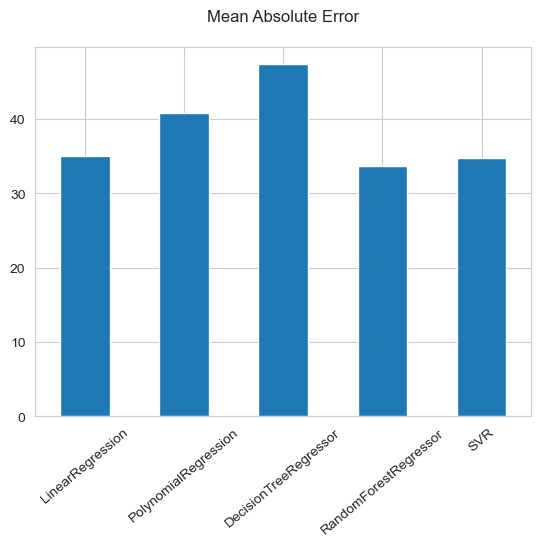

In [126]:
metrics_df.loc["mae"].plot.bar()
plt.title("Mean Absolute Error\n")
plt.xticks(rotation=40);

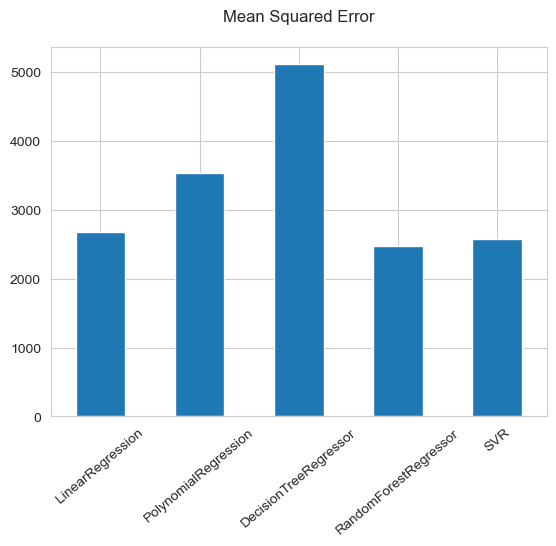

In [127]:
metrics_df.loc["mse"].plot.bar()
plt.title("Mean Squared Error\n")
plt.xticks(rotation=40);

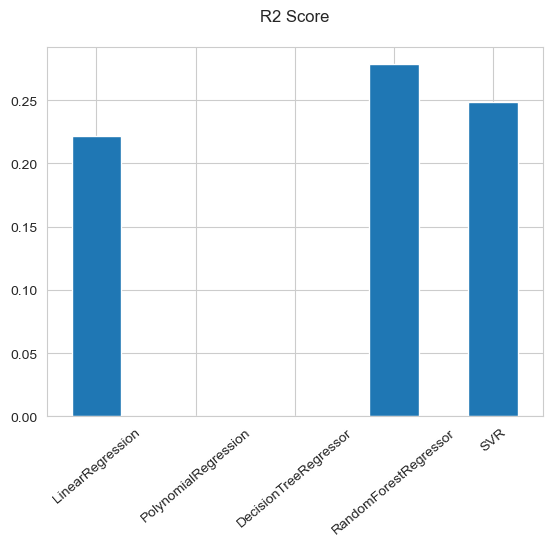

In [128]:
metrics_df.loc["r2_score"].plot.bar()
plt.title("R2 Score\n")
plt.xticks(rotation=40);
# here polynomial regression and decision tree has a very low r2 score